In [1]:
%matplotlib notebook

In [2]:
import os
import pandas as pd

In [3]:
userpath = os.path.expanduser('~')
onedrivepath = os.path.join(userpath.replace('C:', 'D:'), r'OneDrive - Transport Systems Catapult')
infolder = r'../Data/Roadworks'

In [4]:
infile = r'HE_Roadworks Data_2011-2016.xlsx'
infilepath = os.path.join(infolder, infile)

In [5]:
rworks = pd.read_excel(infilepath)

In [6]:
cols = rworks.columns
new_cols = []
for c in cols:
    col = c.replace(' ','_')
    new_cols.append(col)
rworks.columns = new_cols

In [7]:
rworks.head()

,OBJECTID,Reference,Road,LHA,Location,Start_Date,End_Date,Expected_Delay,Description,Traffic_Management,...,Distance,reference1,Pointroad,LinkRef_12,LinkDesc_1,LinkRoad,Distance_1,Connect,Lat,Long
0,375,1858918,A38,Derbyshire / Staffordshire,"Wall Island to Toyota Island, Both Directions",2011-10-10,2011-11-04,Slight (less than 10 mins),(Nightly) 18:00 - 06:00 Lane 1 & 2 closure on ...,Lane Closure,...,474.149747,1858918,A38,AL1004,A38 between A513 and A5121 (AL1004),A38,474,Match,52.762320,-1.703527
1,390,1850256,A64,North Yorkshire,Grimston,2011-10-10,2011-10-11,Slight (less than 10 mins),Lane 1 closure on eastbound entry slip road fo...,Lane Closure,...,37.773957,1850256,A64,AL1059,A64 between A1079 and A1237 (AL1059),A64,38,Match,53.959579,-1.011490
2,649,1859585,A50,Staffordshire,"Longton Exit Slip, Westbound",2011-10-12,2011-10-14,Moderate (10 - 30 mins),Full overnight closure from 2000 - 0600 hrs fo...,Carriageway Closure,...,194.692263,1859585,A50,AL1122,A50 between A50 and A5035 (AL1122),A50,195,Match,52.986507,-2.140311
3,29,1115849,A1,Northumberland,Lane Head to Shilbottle,2010-11-01,2011-11-30,Slight (less than 10 mins),24 hr contraflow for resurfacing and construct...,Contraflow,...,2029.722901,1115849,A1,AL1179,A1 between A697 and A1068 (AL1179),A1,2030,Match,55.362382,-1.692163
4,145,1673296,A1,Gateshead / Newcastle upon Tyne,NB+SB Blaydon Bridge,2011-09-24,2011-10-20,Slight (less than 10 mins),Nightime Carriageway Closure 2000-0600 North a...,Carriageway Closure,...,95.576122,1673296,A1,AL1211A,A1 between A694 and A1 (AL1211A),A1,96,Match,54.972732,-1.694438


In [11]:
rworks.groupby([rworks.Start_Date.dt.month, 'Road'])['Reference'].count().unstack('Start_Date').sum(axis=1).sort_values(ascending=False).head(10).plot.bar()

Road
A1       3227.0
A10         7.0
A1001       5.0
A1023       7.0
A1033     159.0
A1053      25.0
A1089     316.0
A11       558.0
A12      1117.0
A120      455.0
A127       27.0
A13      1165.0
A14      2306.0
A14M       44.0
A160       87.0
A162       78.0
A167        8.0
A168       84.0
A174       97.0
A177        2.0
A180      296.0
A184       31.0
A19       950.0
A194M      93.0
A195M       1.0
A1M      3412.0
A2       1514.0
A20       528.0
A2070     210.0
A21       813.0
          ...  
M27      2199.0
M271      226.0
M3       4084.0
M32       314.0
M4       7204.0
M40      6257.0
M42      2475.0
M45       100.0
M48       339.0
M49       124.0
M5       6742.0
M50       376.0
M53      1009.0
M54       759.0
M55       290.0
M56      1605.0
M57       526.0
M58       363.0
M6       8885.0
M60      2195.0
M602      281.0
M606      290.0
M61       959.0
M62      4831.0
M621      772.0
M65       766.0
M66       430.0
M67       370.0
M69       397.0
UETON      37.0
Length: 162, dtype:

In [12]:
rworks.groupby([rworks.Start_Date.dt.month, 'Road'])['Reference'].count().unstack('Start_Date')

Start_Date,1,2,3,4,5,6,7,8,9,10,11,12
Road,,,,,,,,,,,,
A1,305.0,311.0,359.0,242.0,196.0,254.0,256.0,237.0,266.0,311.0,282.0,208.0
A10,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0
A1001,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
A1023,NaN,NaN,1.0,NaN,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
A1033,19.0,15.0,16.0,20.0,18.0,5.0,9.0,11.0,15.0,9.0,13.0,9.0
A1053,2.0,NaN,2.0,3.0,NaN,3.0,1.0,4.0,4.0,1.0,1.0,4.0
A1089,9.0,49.0,19.0,25.0,16.0,25.0,39.0,11.0,18.0,51.0,31.0,23.0
A11,71.0,41.0,79.0,28.0,27.0,30.0,33.0,28.0,55.0,53.0,68.0,45.0
A12,132.0,166.0,147.0,70.0,46.0,92.0,80.0,82.0,57.0,75.0,99.0,71.0


In [86]:
df = rworks.groupby([rworks.Start_Date.dt.month, 'Road'])['Reference'].count()

In [87]:
df = df.unstack('Start_Date')

In [88]:
idx = df.sum(axis=1).sort_values(ascending=False).index

<IPython.core.display.Javascript object>


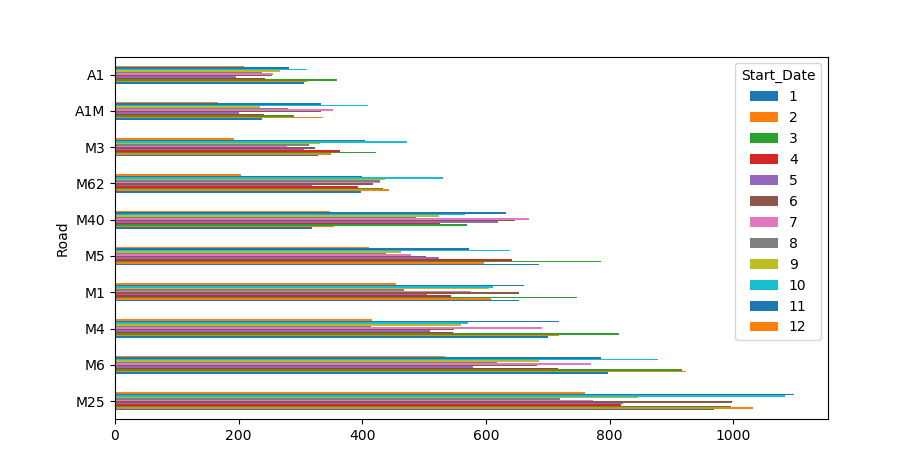

In [93]:
df.reindex(idx).head(10).plot.barh()